Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading the dataset into the dataframes

In [2]:
data=pd.read_csv('AmazonSales.csv')

Viewing the dataframe and its specifications

In [3]:
data.head(10)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50
5,Australia and Oceania,Solomon Islands,Baby Food,Online,C,2/4/2015,547995746,2/21/2015,2974,255.28,159.42,759202.72,474115.08,285087.64
6,Sub-Saharan Africa,Angola,Household,Offline,M,4/23/2011,135425221,4/27/2011,4187,668.27,502.54,2798046.49,2104134.98,693911.51
7,Sub-Saharan Africa,Burkina Faso,Vegetables,Online,H,7/17/2012,871543967,7/27/2012,8082,154.06,90.93,1245112.92,734896.26,510216.66
8,Sub-Saharan Africa,Republic of the Congo,Personal Care,Offline,M,7/14/2015,770463311,8/25/2015,6070,81.73,56.67,496101.10,343986.90,152114.20
9,Sub-Saharan Africa,Senegal,Cereal,Online,H,4/18/2014,616607081,5/30/2014,6593,205.70,117.11,1356180.10,772106.23,584073.87


In [4]:
data.describe

<bound method NDFrame.describe of                                Region                Country        Item Type  \
0               Australia and Oceania                 Tuvalu        Baby Food   
1   Central America and the Caribbean                Grenada           Cereal   
2                              Europe                 Russia  Office Supplies   
3                  Sub-Saharan Africa  Sao Tome and Principe           Fruits   
4                  Sub-Saharan Africa                 Rwanda  Office Supplies   
..                                ...                    ...              ...   
95                 Sub-Saharan Africa                   Mali          Clothes   
96                               Asia               Malaysia           Fruits   
97                 Sub-Saharan Africa           Sierra Leone       Vegetables   
98                      North America                 Mexico    Personal Care   
99                 Sub-Saharan Africa             Mozambique        Househo

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [6]:
data.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [7]:
data.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

Now we drop the columns that are irrelevant to our analysis of the data

In [8]:
data.drop(columns=['Order ID','Order Date','Ship Date'],inplace=True)

In [9]:
data.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost',
       'Total Profit'],
      dtype='object')

We start with the Revenue Distribution by the Item types that were sold

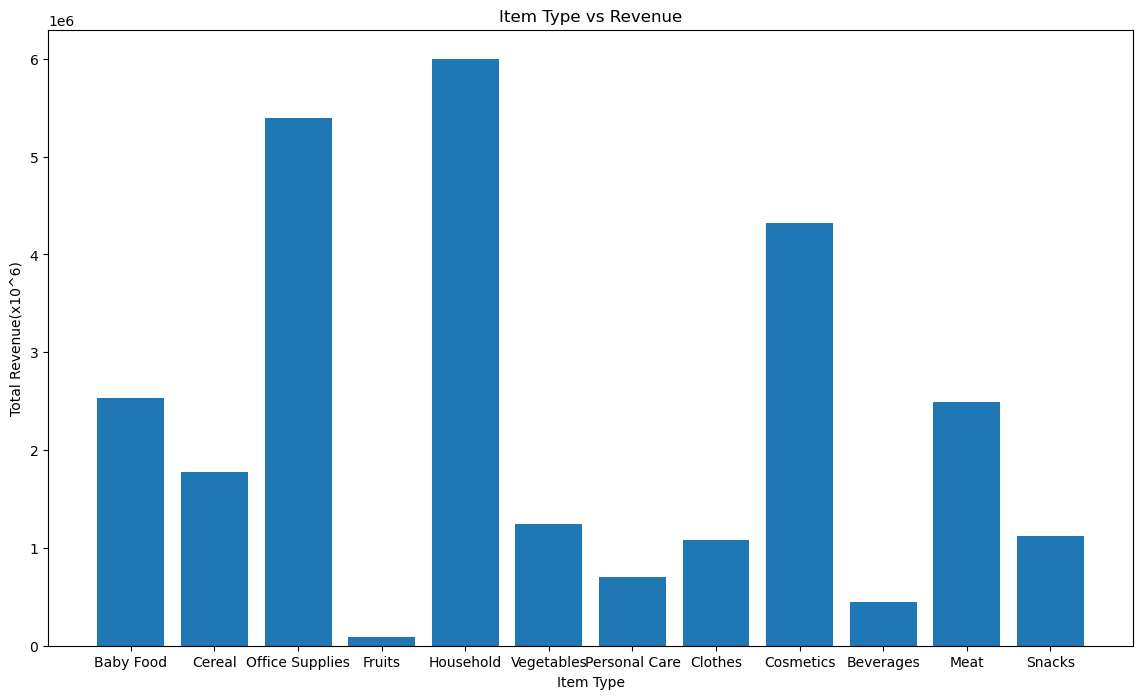

In [10]:
plt.figure(figsize=(14,8))
plt.bar(data['Item Type'],data['Total Revenue'])
plt.xlabel('Item Type')
plt.ylabel('Total Revenue(x10^6)')
plt.title('Item Type vs Revenue')
plt.show()

We can see that the Household Items generated the Most Revenue

Now we look at the  no. of Units Sold per Item Type

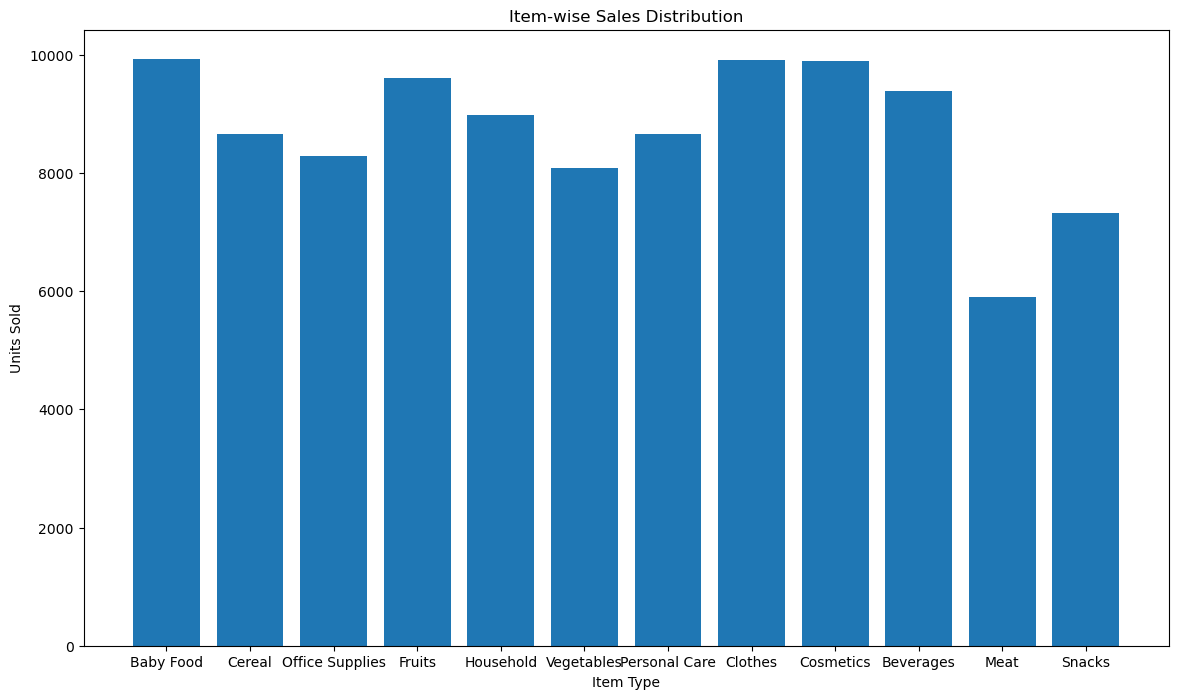

In [11]:
plt.figure(figsize=(14,8))
plt.bar(data['Item Type'],data['Units Sold'])
plt.xlabel('Item Type')
plt.ylabel('Units Sold')
plt.title('Item-wise Sales Distribution')
plt.show()

We can see that Baby Food, Clothes and Cosmetics were the categories that sold the most items 

Now we see the distribution of the Revenue Generated by the company in the market by the Regions they conduct the sales in

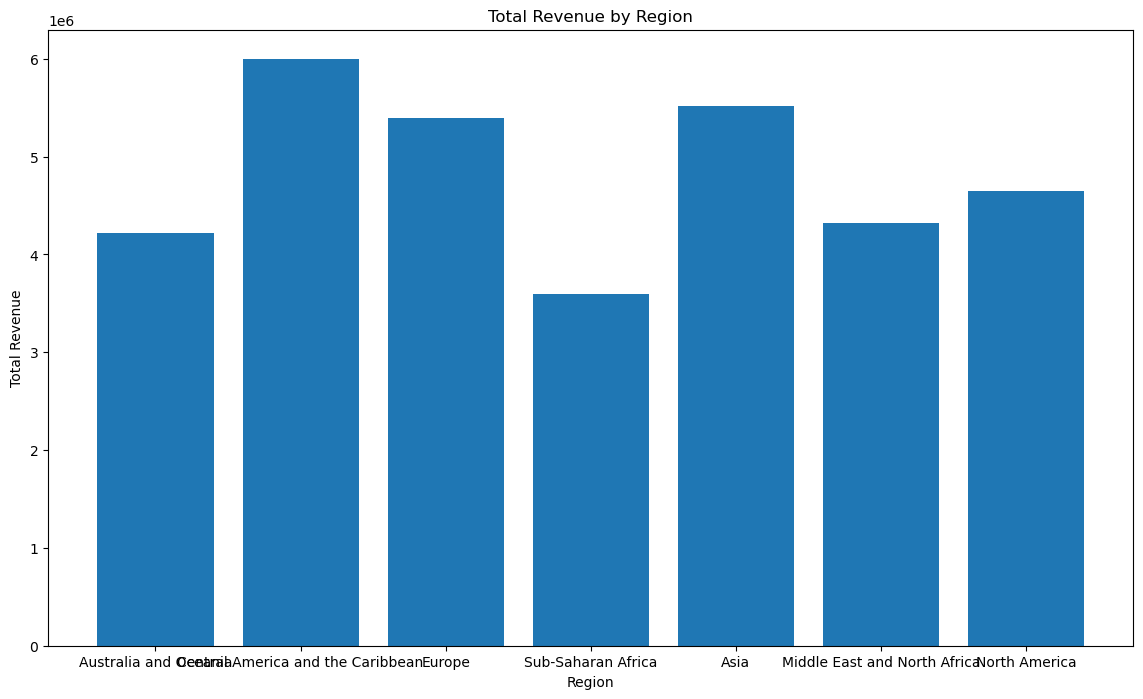

In [12]:
plt.figure(figsize=(14,8))
plt.bar(data['Region'], data['Total Revenue'])
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Region')
plt.show()

We will now see the percentages that the Regional markets account for in the company's ledgers

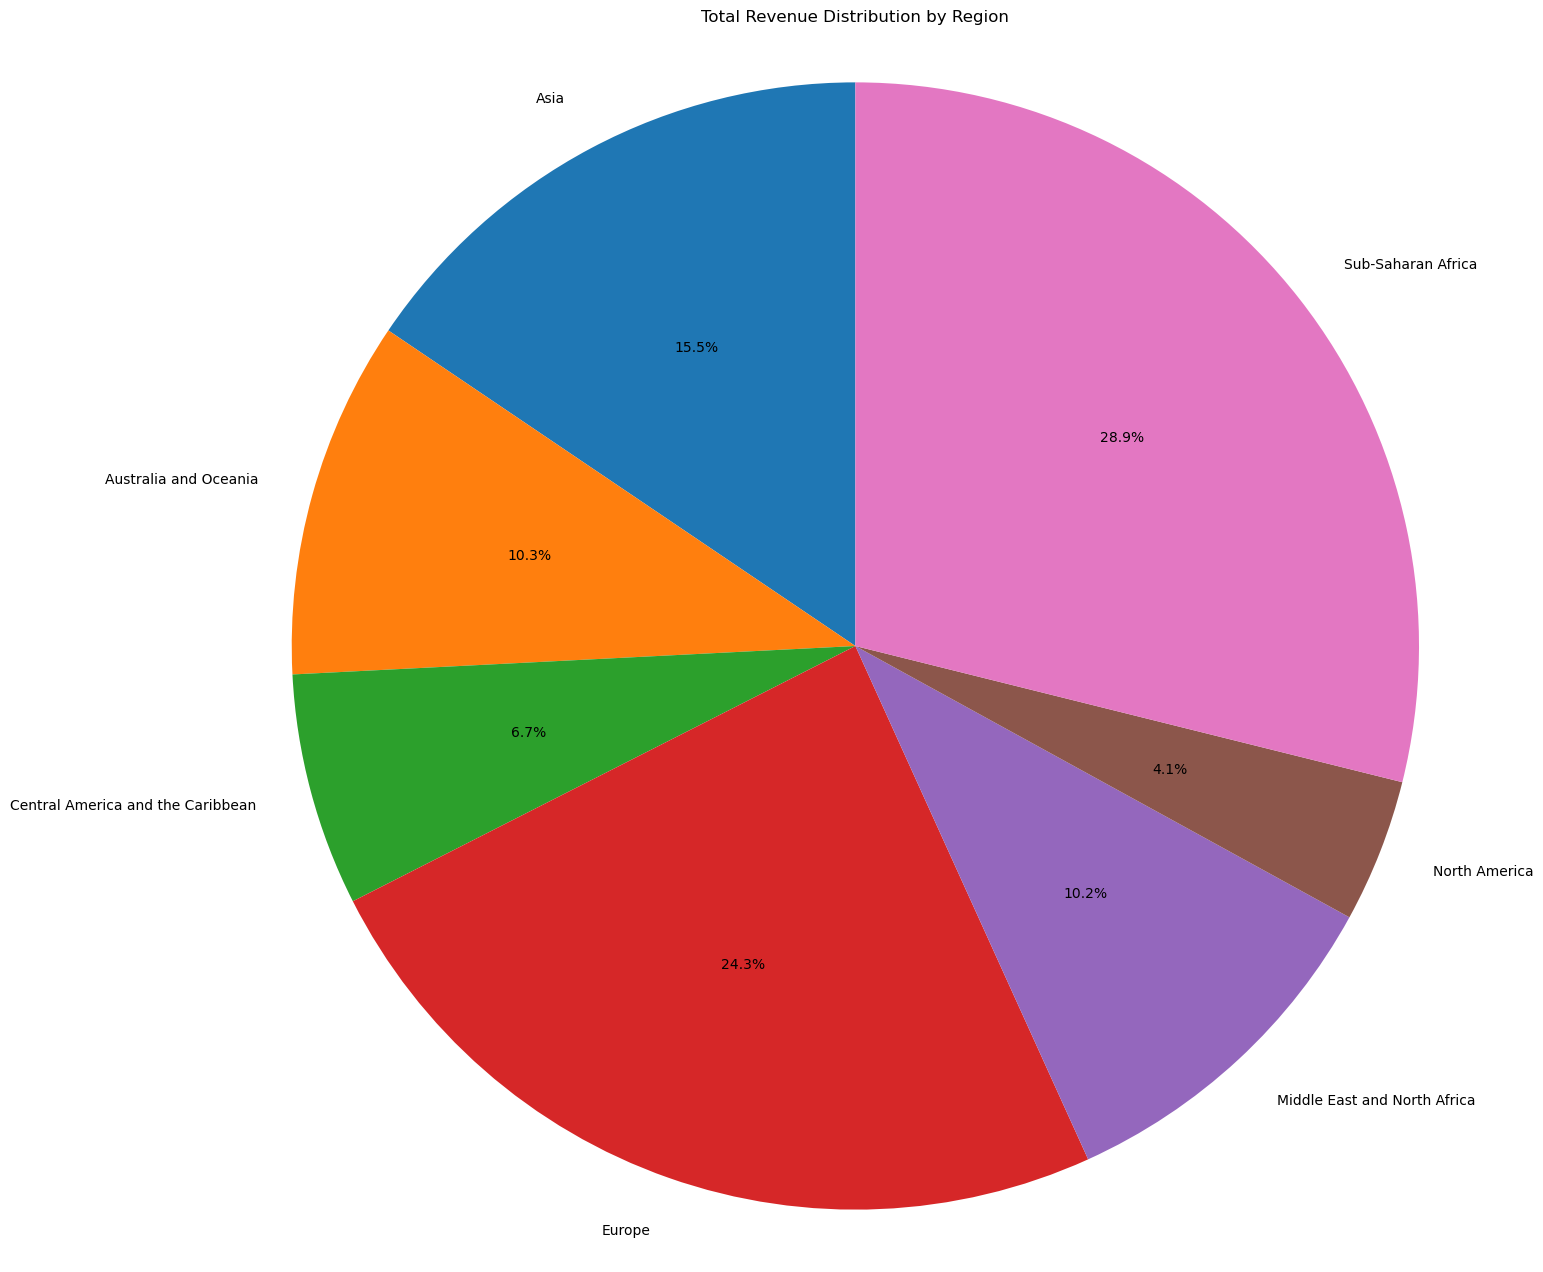

In [13]:
# Pie chart for 'Sales Channel' distribution
plt.figure(figsize=(16,16))

# Group by 'Region' and calculate total revenue for each region
revenue_by_region = data.groupby('Region')['Total Revenue'].sum().reset_index()

# Pie chart for total revenue distribution by region
plt.pie(revenue_by_region['Total Revenue'], labels=revenue_by_region['Region'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.title('Total Revenue Distribution by Region')
plt.show()

Scatterplot for Unit Price against the Item Type

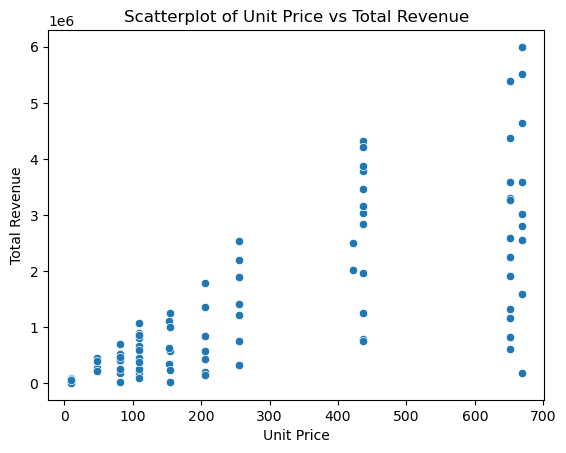

In [14]:
sns.scatterplot(x='Unit Price', y='Total Revenue', data=data)
plt.xlabel('Unit Price')
plt.ylabel('Total Revenue')
plt.title('Scatterplot of Unit Price vs Total Revenue')
plt.show()

Scatterplot of Unit Price vs Total Revenue (Colored by Item Type)

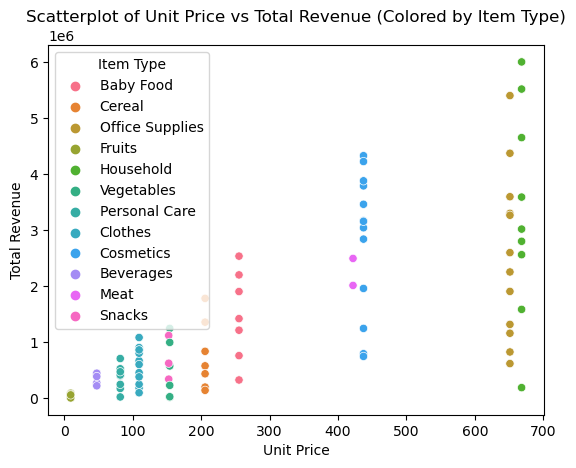

In [15]:
sns.scatterplot(x='Unit Price', y='Total Revenue', hue='Item Type', data=data)
plt.xlabel('Unit Price')
plt.ylabel('Total Revenue')
plt.title('Scatterplot of Unit Price vs Total Revenue (Colored by Item Type)')
plt.show()

Histogram for Unit Cost of the items

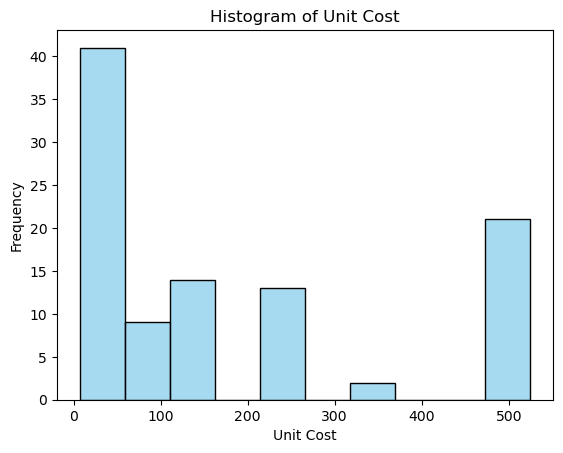

In [16]:
sns.histplot(data['Unit Cost'], bins=10, kde=False, color='skyblue', edgecolor='black')
plt.xlabel('Unit Cost')
plt.ylabel('Frequency')
plt.title('Histogram of Unit Cost')
plt.show()

We create a stacked barchart to observe the Total Revenue and the Total Cost by Item Type

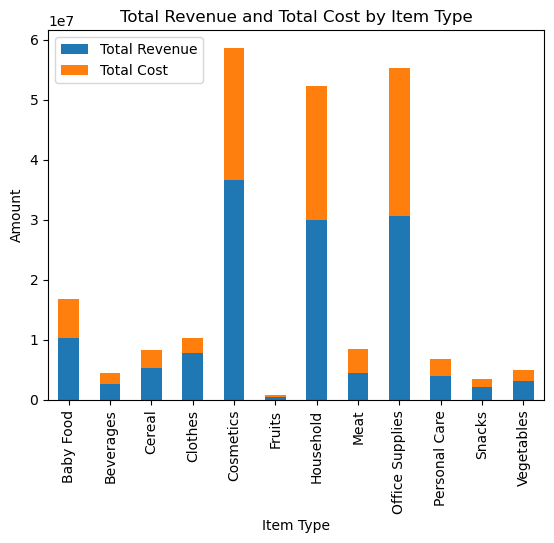

In [17]:
item_summary = data.groupby('Item Type')[['Total Revenue', 'Total Cost']].sum()

# Stacked bar chart for 'Total Revenue' and 'Total Cost' by 'Item Type'
item_summary.plot(kind='bar', stacked=True)
plt.xlabel('Item Type')
plt.ylabel('Amount')
plt.title('Total Revenue and Total Cost by Item Type')
plt.show()